# Présentation du dataset : Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Ce dataset est le résultat d'un sondage concernant le consommation de drogue. 1885 personnes ont participé et répondu à des questions concernant l'utilisation de 18 drogues différentes et la mesure de 12 autres indicateurs. Dans le dataset de départ, les indicateurs sont codés par des nombres.   
Voici les différents éléments qui composent le dataset :  
    - Informations générales sur la personne interrogée ('ID', 'Age', 'Gender', 'Education', 'Country', 
         'Ethnicity')  
    - Information neurologiques sur la personne ( 'Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive',                   'SS') 
    - Liste de drogues et information sur leur consommation ou non ('Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
         'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'Legalh', 'LSD', 'Meth',
         'Mushrooms', 'Nicotine', 'Semer', 'VSA')
    
   


# Imports utiles pour le projet

In [58]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import *

# Importation des données

In [59]:
df_col = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
         'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'Legalh', 'LSD', 'Meth',
         'Mushrooms', 'Nicotine', 'Semer', 'VSA']

len(df_col)

32

In [60]:
file = "Dataset/drug_consumption.data"
dataraw = pd.read_csv(file, sep=",",encoding='utf-8',float_precision='round_trip', header=None)
dataraw.columns = df_col
dataraw.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# Mise en forme des données 

On a importé le dataset dans un premier tableau mais vu que les données sont numériques, on veut aussi avoir un deuxième tableau avec les données traduites en clair.
Le premier (dataraw) est le tableau brut.
Le deuxième (clear) que l'on va créer ci-dessous contient leur correspondance en langage naturel

In [61]:
# Age equivalent:
def return_age(clear):
    clear.loc[(clear['Age'] ==  -0.95197), 'Age'] = "18_24"
    clear.loc[(clear['Age'] ==  -0.07854), 'Age'] = "25_34"
    clear.loc[(clear['Age'] ==  0.49788), 'Age'] = "35_40"
    clear.loc[(clear['Age'] ==  1.09449), 'Age'] = "45_54"
    clear.loc[(clear['Age'] ==  1.82213), 'Age'] = "55_64"
    clear.loc[(clear['Age'] ==  2.59171), 'Age'] = "65+"
    return clear

In [62]:
# Gender equivalent:
def return_gender(clear):
    clear.loc[(clear['Gender'] == 0.48246), 'Gender'] = "F"  
    clear.loc[(clear['Gender'] == -0.48246), 'Gender'] = "M"  
    return clear

In [63]:
# Education equivalent
def return_ed(clear):
    clear.loc[(clear['Education'] ==  -2.43591), 'Education'] = "Left school before 16 years"  
    clear.loc[(clear['Education'] ==  -1.73790), 'Education'] = "Left school at 16 years"
    clear.loc[(clear['Education'] ==  -1.43719), 'Education'] = "Left school at 17 years"
    clear.loc[(clear['Education'] ==  -1.22751 ), 'Education'] ="Left school at 18 years"
    clear.loc[(clear['Education'] ==  -0.61113), 'Education'] = "Some college or university, no certificate or degree"
    clear.loc[(clear['Education'] ==  -0.05921 ), 'Education'] = "Professional certificate/ diploma"
    clear.loc[(clear['Education'] ==  0.45468), 'Education'] = "University degree"
    clear.loc[(clear['Education'] ==  1.16365), 'Education'] = "Masters degree"
    clear.loc[(clear['Education'] ==  1.98437), 'Education'] = "Doctorate degree"
    return clear

In [64]:
# Country equivalent
def return_country(clear):
    clear.loc[(clear['Country'] ==   -0.09765), 'Country'] = "Australia"
    clear.loc[(clear['Country'] ==  0.24923), 'Country'] = "Canada"
    clear.loc[(clear['Country'] ==  -0.46841), 'Country'] = "New Zealand"
    clear.loc[(clear['Country'] ==   -0.28519), 'Country'] = "Other"
    clear.loc[(clear['Country'] ==  0.21128), 'Country'] = "Republic of Ireland"
    clear.loc[(clear['Country'] ==  0.96082), 'Country'] = "UK"
    clear.loc[(clear['Country'] ==  -0.57009), 'Country'] = "USA"
    return clear

In [65]:
# Ethnicity equivalent
def return_ethni(elem):
    clear.loc[(clear['Ethnicity'] == -0.50212), 'Ethnicity'] = "Asian"
    clear.loc[(clear['Ethnicity'] == -1.10702), 'Ethnicity'] = "Black"
    clear.loc[(clear['Ethnicity'] == 1.90725), 'Ethnicity'] = "Mixed Black/Asian"
    clear.loc[(clear['Ethnicity'] ==  0.12600), 'Ethnicity'] = "Mixed White/Asian"
    clear.loc[(clear['Ethnicity'] ==  -0.22166), 'Ethnicity'] =  "Mixed White/Black"
    clear.loc[(clear['Ethnicity'] ==  0.11440), 'Ethnicity'] = "Other"
    clear.loc[(clear['Ethnicity'] == -0.31685), 'Ethnicity'] = "White"
    return clear

In [66]:
clear = dataraw.copy()
clear = return_age(clear)
clear = return_gender(clear)
clear = return_ed(clear)
clear = return_country(clear)
clear = return_ethni(clear)
clear

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35_40,F,Professional certificate/ diploma,UK,Mixed White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25_34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35_40,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18_24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35_40,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18_24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,18_24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,25_34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,18_24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


# Exploration des données

Maintenant que les données sont importées, nous allons faire une exploration générale du dataset.

In [67]:
first = dataraw.describe(include=np.object)
first

,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7
top,CL5,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
freq,759,976,1305,1000,1385,463,807,1038,1627,1021,1605,1490,1094,1069,1429,982,610,1877,1455


## 1. Les données générales sur la personne interrogée

Dans cette partie de l'exploration, on souhaite obtenir un résumé de notre population : leur origine, leur age etc ...

<AxesSubplot:title={'center':"Nombre de personnes par catégorie d'age"}>

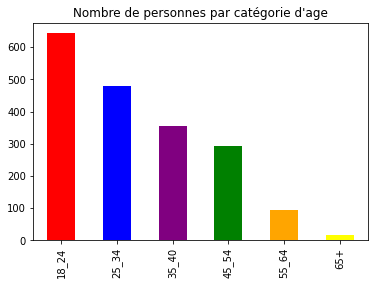

In [68]:
ages = clear["Age"].value_counts()
plt.title("Nombre de personnes par catégorie d'age")
ages.plot.bar(color=['red', 'blue', 'purple', 'green', 'orange', 'yellow'])


<AxesSubplot:title={'center':"Nombre de personnes par catégorie d'études"}>

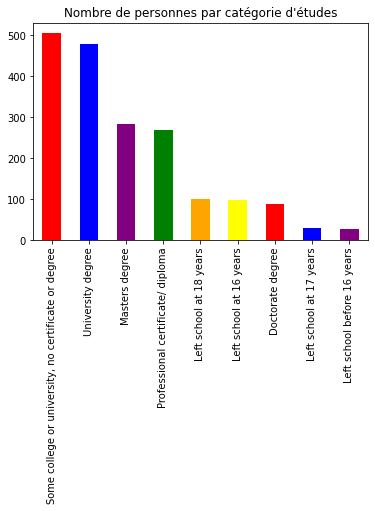

In [69]:
ed = clear["Education"].value_counts()
plt.title("Nombre de personnes par catégorie d'études")
ed.plot.bar(color=['red', 'blue', 'purple', 'green', 'orange', 'yellow'])

<AxesSubplot:title={'center':'Nombre de personnes par Pays'}, ylabel='Country'>

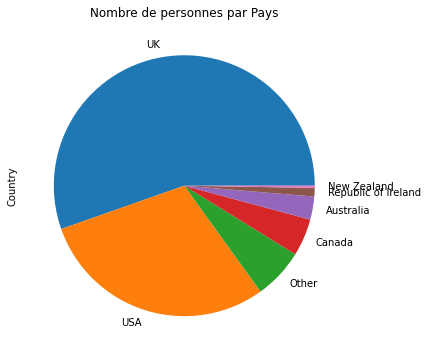

In [70]:
countries = clear["Country"].value_counts()
plt.title("Nombre de personnes par Pays")
countries.plot(kind='pie', figsize=(6, 6))

<AxesSubplot:title={'center':'Nombre de personnes par catégorie ethnique'}, ylabel='Ethnicity'>

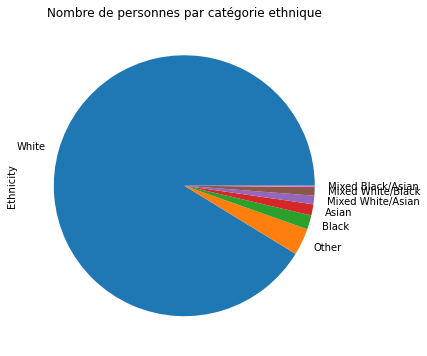

In [71]:
ethny = clear["Ethnicity"].value_counts()
plt.title("Nombre de personnes par catégorie ethnique")
ethny.plot(kind='pie', figsize=(6, 6))

<AxesSubplot:title={'center':'Nombre de personnes par genre'}, ylabel='Gender'>

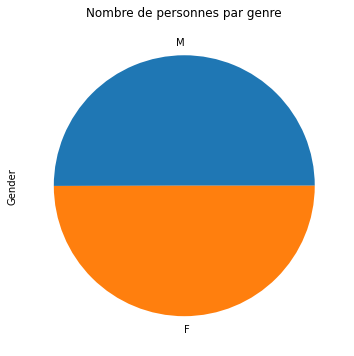

In [72]:
gender = clear["Gender"].value_counts()
plt.title("Nombre de personnes par genre")
gender.plot(kind='pie', figsize=(6, 6))

## 2. Fréquence de consommation des différentes drogues

Interessons nous maintenant aux données concernant la fréquence de consommation de chaque drogue. On a plusieurs paliers/fréquence.  
-Never used  
-Used over a Decade Ago  
-Used in Last Decade  
-Used in Last Year   
-Used in Last Month   
-Used in Last Week  
-Used in Last Day  
Transformons tout d'abord un peu notre tableau pour ne garder que les informations sur les drogues et rendre les données plus lisibles 



In [73]:
# Nouveau tableau avec seulement les données concernant les drogues
drogues = dataraw.iloc[:, 13:]
drogues

,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [74]:
# pour rendre les valeurs lisibles
for i in range (0, 19):
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL0'],'Never')
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL1'],'Decade Ago')
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL2'],'L Decade')
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL3'],'L Year')
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL4'],'L Month')
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL5'],'L Week')
    drogues.iloc[:, i] = drogues.iloc[:, i].replace(['CL6'],'L Day')
drogues

,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,L Week,L Decade,Never,L Decade,L Day,Never,L Week,Never,Never,Never,Never,Never,Never,Never,Never,Never,L Decade,Never,Never
1,L Week,L Decade,L Decade,Never,L Day,L Month,L Day,L Year,Never,L Month,Never,L Decade,Never,L Decade,L Year,Never,L Month,Never,Never
2,L Day,Never,Never,Never,L Day,L Year,L Month,Never,Never,Never,Never,Never,Never,Never,Never,Decade Ago,Never,Never,Never
3,L Month,Never,Never,L Year,L Week,L Decade,L Month,L Decade,Never,Never,Never,L Decade,Never,Never,Never,Never,L Decade,Never,Never
4,L Month,Decade Ago,Decade Ago,Never,L Day,L Year,L Day,Never,Never,Decade Ago,Never,Never,Decade Ago,Never,Never,L Decade,L Decade,Never,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,L Week,Never,Never,Never,L Month,L Week,L Month,Never,Never,Never,Never,Never,L Year,L Year,Never,Never,Never,Never,L Week
1881,L Week,Never,Never,Never,L Week,L Year,L Month,Never,Never,L Decade,Never,Never,L Year,L Week,L Month,L Month,L Week,Never,Never
1882,L Month,L Day,L Week,L Week,L Day,L Day,L Day,L Month,Never,L Month,Never,L Decade,Never,L Decade,Never,L Decade,L Day,Never,Never
1883,L Week,Never,Never,Never,L Day,L Day,L Week,Never,Never,L Year,Never,Never,L Year,L Year,Never,L Year,L Month,Never,Never


Montrons maintenant le proportion de fréquence de consommation pour chaque drogue 

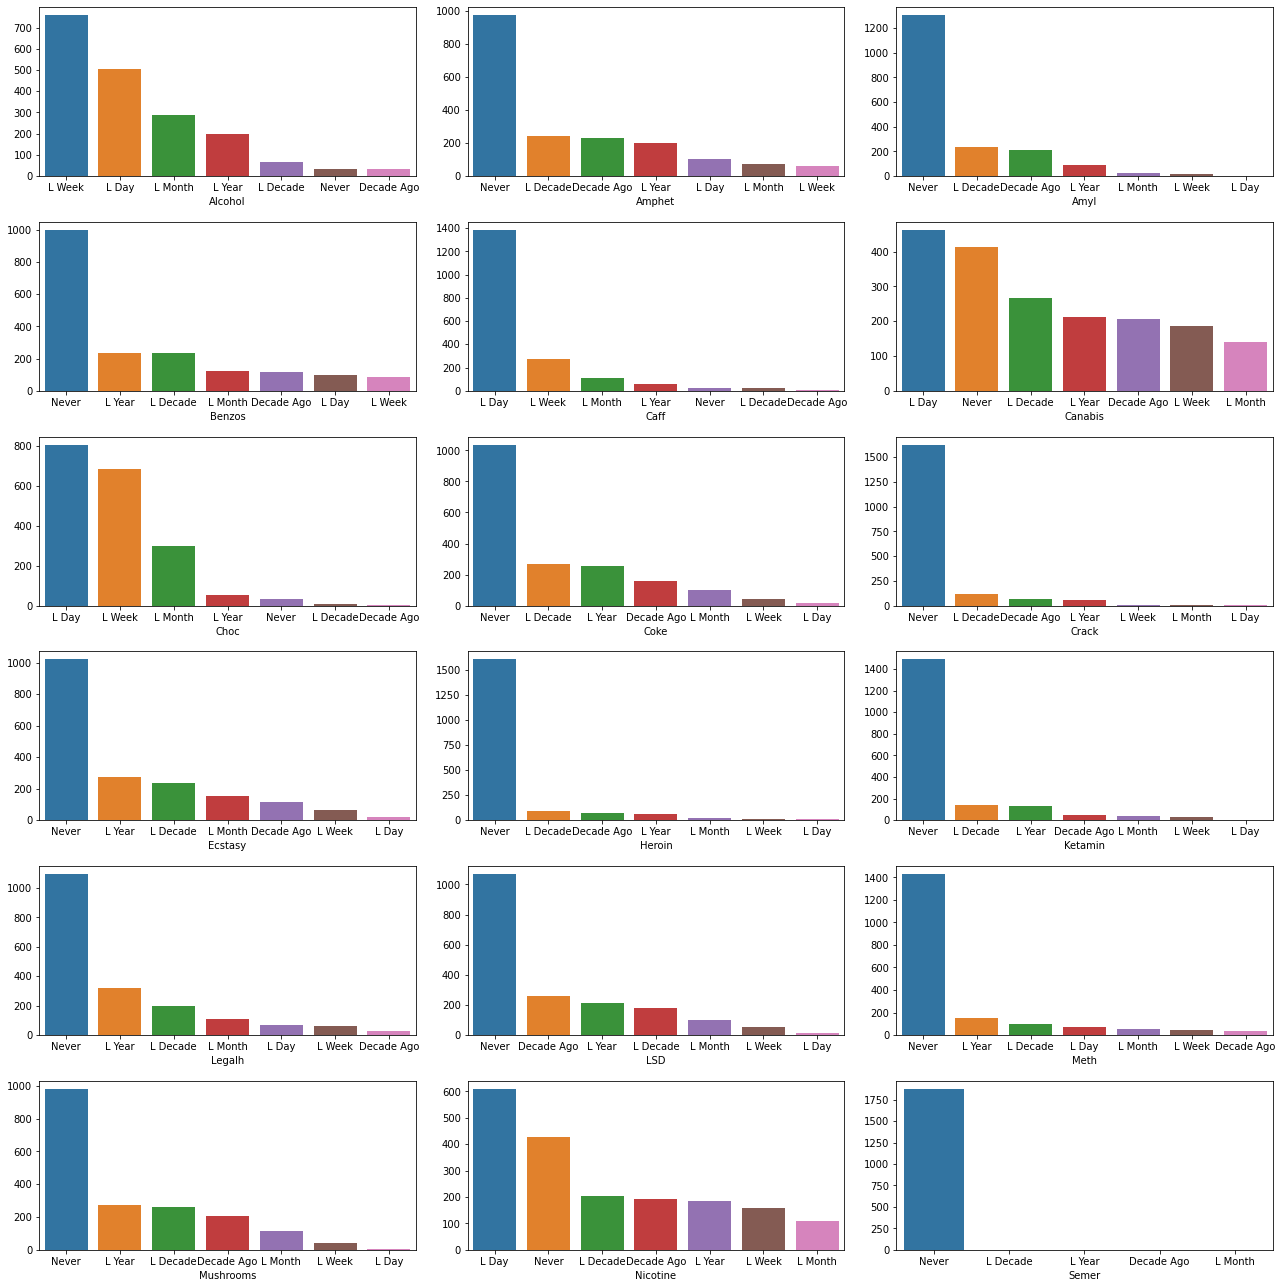

In [76]:
# Pour montrer la prop pour chaque catégorie
k = 0
columns = df_col[13:]
fig, axs = plt.subplots(6, 3, figsize = (18, 18))
for i in range (6):
    for j in range (3):
        d = drogues.value_counts(drogues.iloc[:, k])
        sns.barplot(x = d.index , y = d , ax=axs[i][j])
        k+=1

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='VSA'>

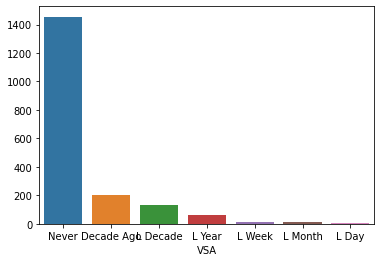

In [78]:
d = drogues.value_counts(drogues.iloc[:, 18])
sns.barplot(x = d.index , y = d)

Que peut-on tirer comme information de ces graphiques ? On remarque deux types de drogues:     
D'un côté on a les drogues dures telles que Coke, Ecstasy etc ... beaucoup des personnes intérrogées n'ont jamais consommé. 
Puis on a des drogues bien plus fréquemment consommées comme la cafféine, le cannabis, le chocolat et la nicotine. 
On aura donc différents comportements et différents facteurs impactant dans ces catégories. Essayons de regarder plus particulièrement quelques drogues. 

# Etudes des drogues et des facteurs de consommation 

## 1. Cafféine
Dans le barplot précédent on trouve quelque chose d'interessant à propos de la cafféine. Il y a une différence de proportions très importante entre ceux qui en consomment tous les jours et ceux qui en consomment peu ou pas. Interessons nous donc dans un premier temps à ces consommateurs de caffeine.

In [79]:
# On crée un tableau avec seulement la cafféine et les données sur l'utilisateur
caff = clear.iloc[:, 1:13]
caff['Caff'] = drogues['Caff'].values
caff

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Caff
0,35_40,F,Professional certificate/ diploma,UK,Mixed White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,L Day
1,25_34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,L Day
2,35_40,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,L Day
3,18_24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,L Week
4,35_40,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,L Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18_24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,L Month
1881,18_24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,L Week
1882,25_34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,L Day
1883,18_24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,L Day


On va s'interesser à ce qui caractérise les consommateurs quotidiens (on part du postulat que ce sont ceux qui ont répondu avoir consommé du café la veille) 
Quels facteurs pourraient avoir un impact ? Regardons par exemple le niveau d'education.
On ne peut prendre les données brut car elle ne sont pas equlibrées. On va donc faire un ratio par catégorie sur total.

In [80]:
# Nombre total par catégorie d'éducation
total=clear['Education'].value_counts().reset_index()
# Nombre par catégorie de consommateur quotidien de café
day = caff[caff.Caff =="L Day"]
total_cat=day['Education'].value_counts().reset_index()
# Merge des deux pour pouvoir ensuite faire un ratio
merged = total_cat.merge(total, on='index')
merged.head()

,index,Education_x,Education_y
0,"Some college or university, no certificate or ...",352,506
1,University degree,350,480
2,Masters degree,222,283
3,Professional certificate/ diploma,206,270
4,Left school at 16 years,72,99


In [81]:
def add_ratio(group):
    group['ratio']=group.Education_x/group.Education_y
    return group

education_caff = merged.groupby("index").apply(add_ratio)
education_caff.head()

,index,Education_x,Education_y,ratio
0,"Some college or university, no certificate or ...",352,506,0.695652
1,University degree,350,480,0.729167
2,Masters degree,222,283,0.784452
3,Professional certificate/ diploma,206,270,0.762963
4,Left school at 16 years,72,99,0.727273


<AxesSubplot:title={'center':"Niveau d'éducation des consommateurs quotidiens"}>

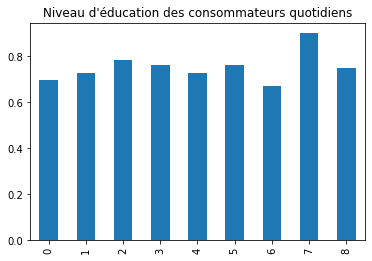

In [82]:
plt.title("Niveau d'éducation des consommateurs quotidiens")
education_caff['ratio'].plot.bar()

Cette piste n'est pas une piste interessante car finalement, le niveau d'étude n'a pas vraiment d'impact, les valeurs se valent. Regardons alors avec l'âge

In [83]:
# Nombre total par catégorie d'éducation
total=clear['Age'].value_counts().reset_index()
# Nombre par catégorie de consommateur quotidien de café
day = caff[caff.Caff =="L Day"]
total_cat=day['Age'].value_counts().reset_index()
# Merge des deux pour pouvoir ensuite faire un ratio
merged = total_cat.merge(total, on='index')
merged.head()

,index,Age_x,Age_y
0,18_24,417,643
1,25_34,354,481
2,35_40,281,356
3,45_54,245,294
4,55_64,72,93


In [84]:
def add_ratio(group):
    group['ratio']=group.Age_x/group.Age_y
    return group

age_caff = merged.groupby("index").apply(add_ratio)
age_caff.head()

,index,Age_x,Age_y,ratio
0,18_24,417,643,0.648523
1,25_34,354,481,0.735967
2,35_40,281,356,0.789326
3,45_54,245,294,0.833333
4,55_64,72,93,0.774194


<AxesSubplot:title={'center':"Niveau d'éducation des consommateurs quotidiens"}>

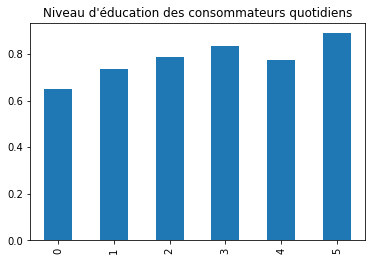

In [85]:
plt.title("Niveau d'éducation des consommateurs quotidiens")
age_caff['ratio'].plot.bar()

Même chose que précedemment, l'age n'a pas beaucoup d'impact. On en déduit que les données personnelles ne sont pas les facteurs les plus révélateurs. Interessons nous donc à une autre catégorie : les scores qui sont révélateurs de la personnalité de l'individu. Nous allons voir la répartition des scores grâce à des plots de densité

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

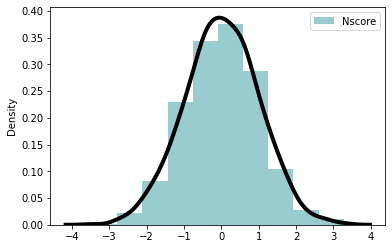

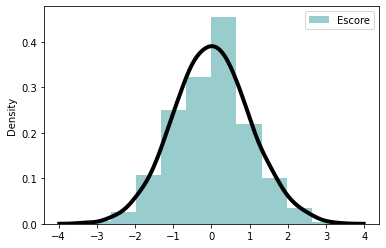

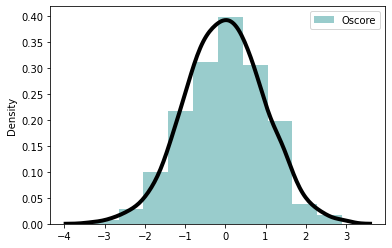

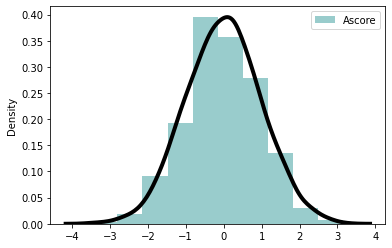

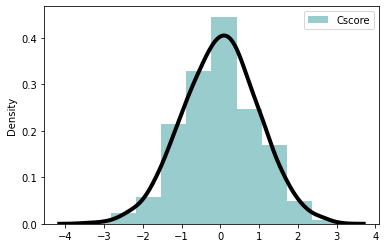

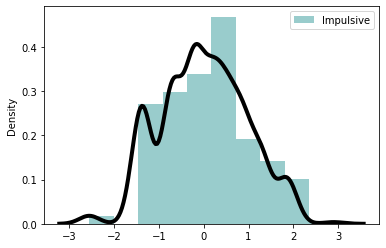

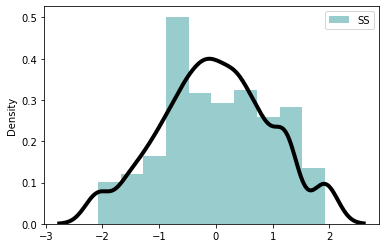

In [86]:
k = 5
lday = caff.loc[caff['Caff'] == "L Day"]
while(k<12):
    fig, ax = plt.subplots(1,1)
    sns.distplot(x = lday.iloc[:, k]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'), label= lday.columns.values[k])
    plt.legend()
    k+= 1

plt.show()

On voit donc que les consommateur de cafféine ont une certaine répartition au niveau des scores. Les scores donnent donc des informations quant à la consommation de cafféine

## 2. Ecstasy 

Intéressons nous maintenant à une l'autre catégorie de drogue définie précédemment. On en choisit pour effectuer notre étude : l'ecstasy. On a remarqué qu'il y a un peu plus de la moitié des personnes intérogées qui n'avaient jamais consommé cette substance. On peut alors se poser une question : qu'est ce qui différencie une personne qui a déjà consommé cette drogue d'une personne qui n'en a jamais consommé ? 

In [87]:
# creation d'un sous dataframe qui donne une valeur de 0 si la personne n'a jamais consommé de drogue et 1 sinon (peu importe la fréquence)
scores = dataraw.copy()
for i in range (0, 32):
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL0'], 0)
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL1'], 1)
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL2'], 1)
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL3'], 1)
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL4'], 1)
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL5'], 1)
    scores.iloc[:, i] = scores.iloc[:, i].replace(['CL6'], 1)
scores    

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,1,1,0,0,0,0,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1,0,0,1,1,1,1,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,1,0,1,0,1,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0


In [88]:
scores[scores.Ecstasy == 1]

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0
11,12,1.09449,-0.48246,-0.61113,-0.28519,-0.31685,-1.32828,0.00332,0.14143,-1.92595,...,1,0,0,0,1,0,1,1,0,0
15,16,1.82213,-0.48246,0.45468,0.96082,-0.31685,-2.05048,-1.50796,-1.55521,-1.07533,...,1,0,0,0,0,0,0,0,0,0
17,18,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.52135,-1.23177,-0.31776,-0.45321,...,1,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1883,-0.95197,-0.48246,-0.61113,-0.28519,-0.31685,-0.79151,0.32197,0.29338,-0.30172,...,1,1,0,1,1,1,0,1,0,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1,0,0,1,1,1,1,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,1,0,1,0,1,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0


Même si précédemment l'étude du niveau d'éducation n'avait rien montré de particulier, est-ce toujours le cas pour cette drogue moins consommée ? 

In [89]:
# Nombre total par catégorie d'éducation
total=scores['Education'].value_counts().reset_index()
# Nombre par catégorie de consommateur quotidien de café
use = scores[scores.Ecstasy == 1]
total_cat=use['Education'].value_counts().reset_index()
# Merge des deux pour pouvoir ensuite faire un ratio
merged = total_cat.merge(total, on='index')
merged.head()

,index,Education_x,Education_y
0,-0.61113,321,506
1,0.45468,195,480
2,-0.05921,100,270
3,1.16365,86,283
4,-1.22751,57,100


In [90]:
def add_ratio(group):
    group['ratio']=group.Education_x/group.Education_y
    return group

education_ec = merged.groupby("index").apply(add_ratio)
education_ec.head()

,index,Education_x,Education_y,ratio
0,-0.61113,321,506,0.634387
1,0.45468,195,480,0.406250
2,-0.05921,100,270,0.370370
3,1.16365,86,283,0.303887
4,-1.22751,57,100,0.570000


<AxesSubplot:title={'center':"Niveau d'éducation des consommateurs quotidiens"}>

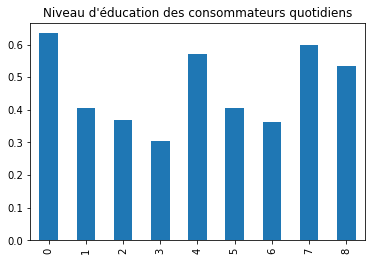

In [91]:
plt.title("Niveau d'éducation des consommateurs quotidiens")
education_ec['ratio'].plot.bar()

Comme précédemment, on remarque que les différences de niveau d'éducation ne sont pas enormément significatives. Passons donc directement à l'étude des scores pour les users et les non users

In [92]:
Used

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0
11,12,1.09449,-0.48246,-0.61113,-0.28519,-0.31685,-1.32828,0.00332,0.14143,-1.92595,...,1,0,0,0,1,0,1,1,0,0
15,16,1.82213,-0.48246,0.45468,0.96082,-0.31685,-2.05048,-1.50796,-1.55521,-1.07533,...,1,0,0,0,0,0,0,0,0,0
17,18,1.09449,-0.48246,-1.73790,0.96082,-0.31685,0.52135,-1.23177,-0.31776,-0.45321,...,1,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1883,-0.95197,-0.48246,-0.61113,-0.28519,-0.31685,-0.79151,0.32197,0.29338,-0.30172,...,1,1,0,1,1,1,0,1,0,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1,0,0,1,1,1,1,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,1,0,1,0,1,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0


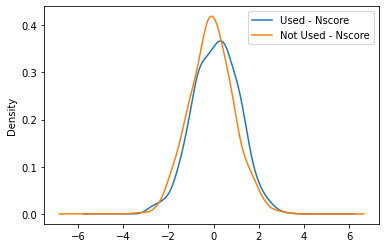

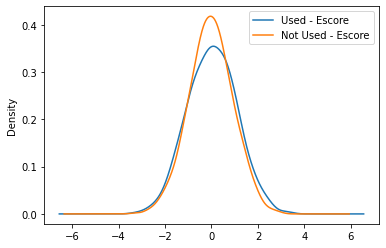

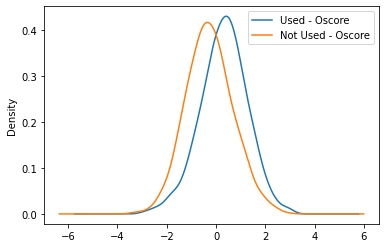

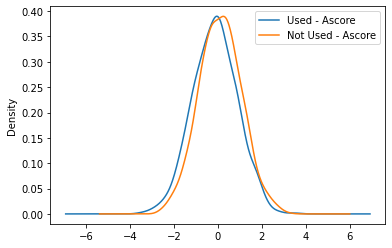

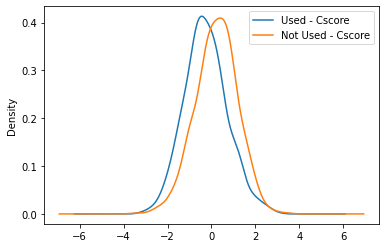

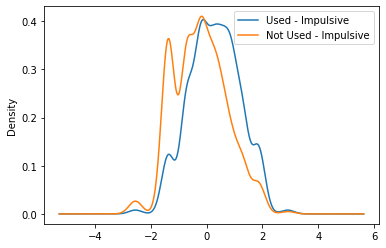

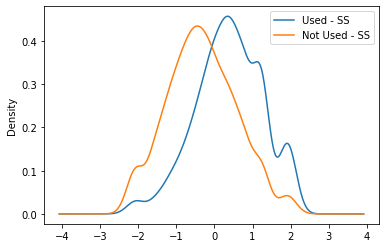

In [93]:
k = 6
NotUsed = scores.loc[scores['Ecstasy'] == 0]
Used = scores.loc[scores['Ecstasy'] == 1]
while(k<13):
    fig, ax = plt.subplots(1,1)
    Used.iloc[:, k].plot(kind='density', label = "Used - " + Used.columns.values[k])
    NotUsed.iloc[:, k].plot(kind='density', label = "Not Used - " + NotUsed.columns.values[k])
    k+= 1
    plt.legend()

plt.show()

On voit bien que la répartition des score pour les User ou non User n'est pas la même. Ainsi, les scores permettent d'obtenir des information pour classer un individu dans une des deux catégories

## 3. Canabis


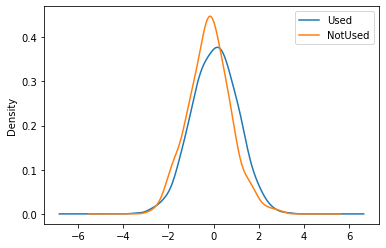

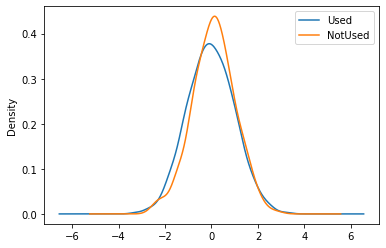

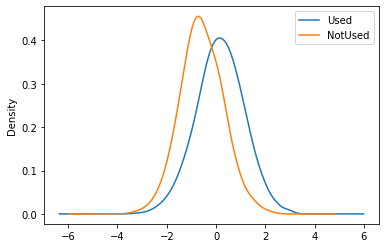

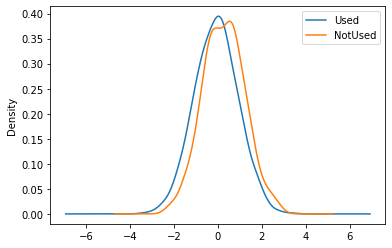

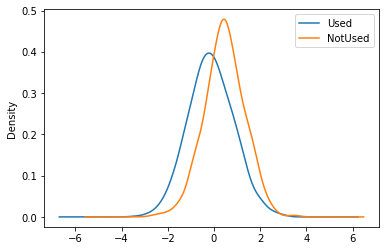

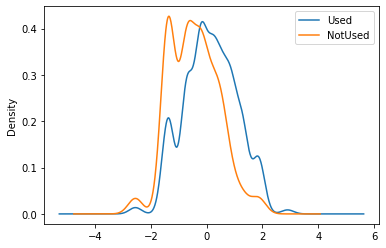

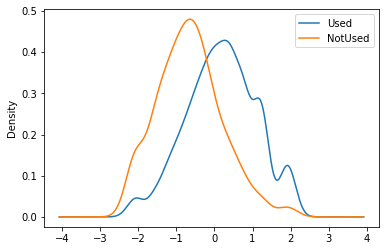

In [94]:
# Rajouter les labels de la densité 
k = 6
NotUsed2 = scores.loc[scores['Canabis'] == 0]
Used2 = scores.loc[scores['Canabis'] == 1]
while(k<13):
    fig, ax = plt.subplots(1,1)
    Used2.iloc[:, k].plot(kind='density', label = 'Used')
    NotUsed2.iloc[:, k].plot(kind='density', label = 'NotUsed')
    k+= 1
    plt.legend()

plt.show()

Comme précedemment, la répartition entre user et non user n'est pas la meme. On peut s'en servir pour faire une classification

##  Matrice de corrélation

La matrice de corrélation est une resource très interéssante pour voir quelles variables peuvent avoir du poids. Affichons cette matrice pour en tirer des conclusions.

In [95]:
# On réarrange le dataset de départ en transformant les nonUser/user en 0 et 1
# Pour la partie machine learning, on utilisera les valeurs numériques de toutes les autres colonnes.
new_data = dataraw.copy()
for i in range (13, 32):
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL0'],0)
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL1'],0)
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL2'],1)
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL3'],1)
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL4'],1)
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL5'],1)
    new_data.iloc[:, i] = new_data.iloc[:, i].replace(['CL6'],1)
    
new_data 

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,1,1,0,0,0,0,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1,0,0,1,1,1,1,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,1,0,1,0,1,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0


In [96]:
correl = new_data.corr()
correl.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,1.000000,-0.271395,-0.025467,-0.025253,-0.340751,0.059309,0.018639,-0.046960,0.173565,-0.028782,...,0.158428,0.100945,0.060502,0.227707,0.219626,0.184348,0.211291,0.096934,0.042599,0.121215
Age,-0.271395,1.000000,0.110286,0.158811,0.354241,-0.069753,-0.136654,-0.033849,-0.226778,0.063504,...,-0.383302,-0.138296,-0.206659,-0.455681,-0.360798,-0.217836,-0.361864,-0.318596,-0.038570,-0.292265
Gender,-0.025467,0.110286,1.000000,0.196774,0.216271,-0.001213,0.074646,0.057864,-0.131021,0.219743,...,-0.232545,-0.134142,-0.188021,-0.310896,-0.263593,-0.187600,-0.254778,-0.159519,0.018866,-0.129469
Education,-0.025253,0.158811,0.196774,1.000000,0.225311,-0.036099,-0.100993,0.115645,0.057994,0.091088,...,-0.180801,-0.135732,-0.080035,-0.195404,-0.164762,-0.182491,-0.153713,-0.186958,-0.026168,-0.145192
Country,-0.340751,0.354241,0.216271,0.225311,1.000000,-0.127946,-0.136191,0.109524,-0.341969,0.150921,...,-0.335787,-0.303658,-0.115677,-0.432470,-0.472601,-0.443667,-0.464904,-0.271755,-0.061997,-0.287558


<AxesSubplot:>

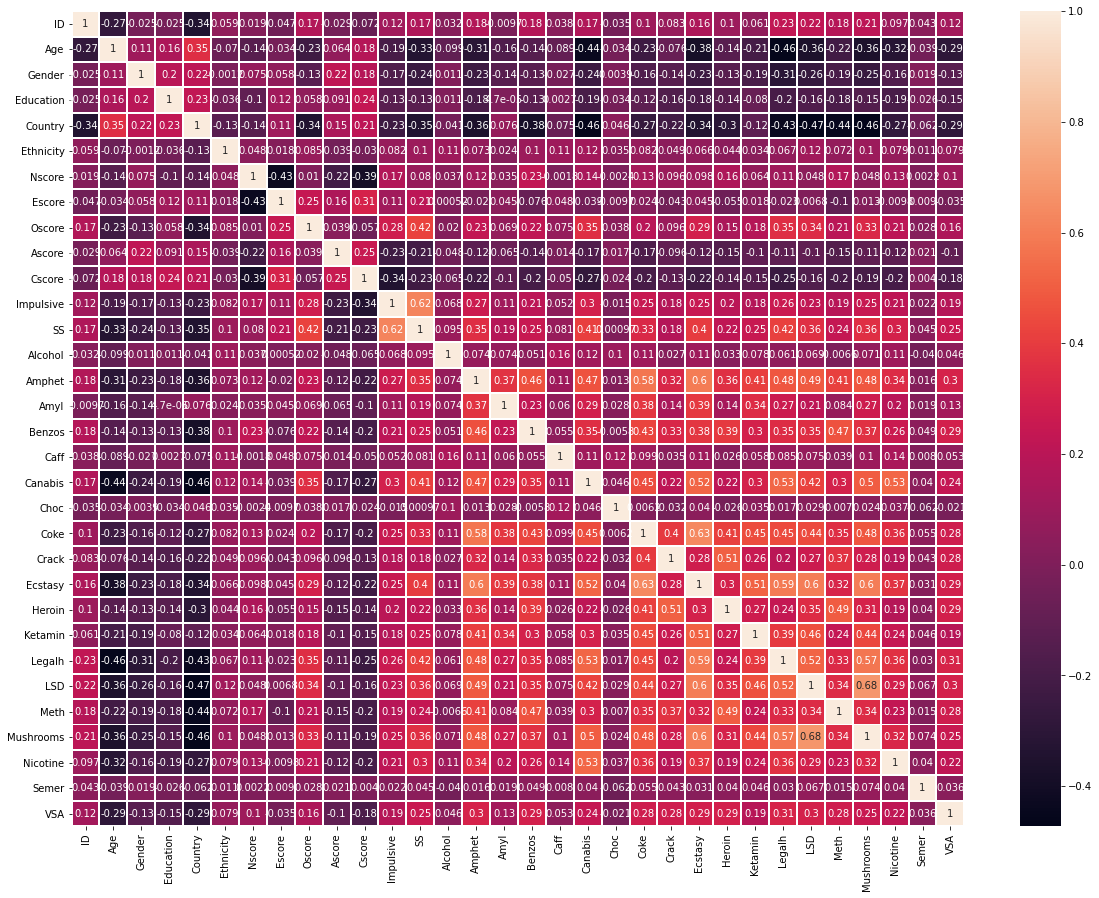

In [97]:
plt.subplots(figsize=(20,15))
sns.heatmap(new_data.corr(),annot=True,lw=1)

Quels résultats en tirons nous ?   
Tout d'abord, on sait qu'il existe des pléiades : la consommation d'une drogue augmente la probabilité d'en consommer une autre. Les retrouve-t-on dans ce graphique ?   
    - Héroine avec crack meth et coke : cette corrélation se retrouve sur le graph avec des correspondance bien plus importantes que les autres (respectivement 0.51, 0.49 et 0.41
    - Ecstasy avec amphetamines, cannabis, cocaine, ketamine, LSD, magic mushrooms, legal highs. On retrouve bien ces corrélations sur la matric avec des valeurs bien plus hautes (montant jusqu'a plus de 0.6)
    -Benzos avec methadone, amphetamines, cocaine (respectivement 0.46, 0.47, 0.43)
    
Les théories sur les pléiade avancées dans le papier des chercheurs se retrouve bien sur le graphique. Ces éléments pourront être utilisés pour faire de l'apprentissage. 

Concernant les score psychologiques, on remarque des valeurs plus ou moins hautes dans certaines catégories pour chaque drogue : les scores ont donc bien un impact sur la possibilité ou non de consommation.


# Machine Learning

## 1. Algorithmes utiles pour la suite

In [98]:
# imports 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets, metrics, model_selection, svm
from sklearn.neighbors import KNeighborsClassifier

In [99]:

def svm_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur Support Vector Machine
    Notamment : 'C', 'kernel' et 'gamma'
    """
    import sys
    from sklearn.model_selection   import GridSearchCV
    from sklearn.svm               import SVC
    import pickle
    parameters = {  "C"              : [1.0, 0.5,0.1],# 2]                , 
                    "kernel"         : ['rbf', 'poly', 'sigmoid'],#        ,
                    "degree"         : [2],# , 3, 4,5,6                    , 
                    "gamma"          : [0.01],#, 0.1, 0.001, 0.5]           , 
                    "coef0"          : [0.0]                             , 
                    "shrinking"      : [True]                            , 
                    "probability"    : [True,False]                            , 
                    "tol"            : [0.001]                           , 
                    "cache_size"     : [10]                              , 
                    "class_weight"   : [None]                            , 
                    "verbose"        : [False]                           , 
                    "max_iter"       : [-1]                              , 
                    "random_state"   : [None]                            }
   
    
    
    print ("-"*30, "\n svm_grid_search"); sys.stdout.flush()
    
    """
        Search Grid
    """
    grid    = GridSearchCV(SVC(), parameters, verbose=0, scoring='f1_weighted')
    try :grid.fit(df, Y)
    except Exception as e : 
        print ("[svm_grid_search - 2] : %s"%e) ; 
        print ("x_train, y_train : ", x_train, y_train)

    print (" best_score_ = %.2f with =  %s "%(grid.best_score_, grid.best_estimator_ ) ); sys.stdout.flush()    
    
    cv_results = pd.DataFrame(grid.cv_results_)
    print(cv_results.iloc[grid.best_index_])
    
    return grid.best_estimator_

In [100]:
def draw_roc_curve(fitted_c, x_test, y_test, title):
    """
    Créé et affiche la courbe ROC des données de test X et Y selon un classifieur (SVM, KNN, RF).
    Permet de représenter l'évolution de la vitesse d'apprentissage du classifieur.
    Taux de vrais-positifs en fonction du taux de faux-négatif.
    Plus l'aire sous la courbe est grande, plus le classifieur est idéal.
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    c                                        = fitted_c
    probas                                   = c.predict_proba(x_test)
    false_positive_rate, recall_, thresholds = roc_curve(y_test, probas[:,1])
    roc_auc                                  = auc(false_positive_rate, recall_)
    
    plt.title  ('ROC %.2f %s'%(roc_auc, title))
    plt.legend (loc="lower right")
    plt.plot   ([0,1],[0,1], "r--")
    plt.plot   (false_positive_rate, recall_, 'b', label='AUC = %.2f'%roc_auc)
    plt.xlim   ([0.0,1.1])
    plt.ylim   ([0.0,1.1])
    plt.ylabel ('Recall')
    plt.xlabel ('Fall-out')
    plt.show()

In [101]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    import time
    import datetime
    t = datetime.datetime.now().time()
    print(t.isoformat()[:8])
    return time.time()

In [102]:
def draw_confusion_matrix(y_test, predictions, title):
    """
    Créé et affiche la matrice de confusion des données de Y_test et de celles sur lesquelles on a fait la prédiction.
    Permet d'évaluer la qualité de la classification souhaitée.
    Plus les valeurs diagonales sont élevées, plus le classifieur prédit correctement.
    """
    from sklearn.metrics import confusion_matrix,accuracy_score
    import matplotlib.pyplot as plt
    cm    = confusion_matrix(y_test, predictions)
    accur = accuracy_score  (y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for [%s]'%(accur,title))
    plt.colorbar ()
    plt.show     ()

In [103]:
def RandomForest_grid_search(df, Y):
    """
    Réglage des hyper-paramètres du classifieur Random Forest
    """
    import sys, pickle
    from sklearn.ensemble          import RandomForestClassifier
    from sklearn.model_selection   import GridSearchCV
    from sklearn.metrics           import make_scorer
    from sklearn.preprocessing     import label_binarize
    from sklearn.multiclass        import OneVsRestClassifier
    #grid search :

    parameters = {  "n_estimators"         : [ 10, 100, 200 ], 
                    "min_samples_leaf"     : [  3,   1,   7 ],
                    "criterion"            : ["gini"],#["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["auto"]          ,
                    "warm_start"           : [False]           }
    parameters = {  "n_estimators"         : [ 10], 
                    "min_samples_leaf"     : [  3 ],
                    "criterion"            : ["gini"],#["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["auto"]          ,
                    "warm_start"           : [False]           }
    
    grid_type = "RandomForestClassifier"
    
    print ("-"*30, "\n %s"%grid_type); sys.stdout.flush()
    """
        Search 
    """
    
    # Exhaustive Grid Search : will try all parameters combinations
    # vs RandomizedSeachCV where the model test random combinations.
    
    grid         = GridSearchCV(RandomForestClassifier(), {})#, parameters, verbose=1, scoring='f1_weighted')
    
    try :grid.fit(df, Y)
    except Exception as e : print ("[%s - 2] : %s"%(grid_type,e) )
    
    print (" best_score_ %s with =  %s "%( grid.best_score_,  grid.best_estimator_ ) ); sys.stdout.flush()    
    return grid.best_estimator_

## 2. Prédiction en fonction du profil psychologique

Le but des modèles suivant est de prédire la consommation ou non de drogue en fonction des scores des traits de personnalité BigFive. Nous allons créer 2 modèles, les tester sur plusieurs drogues et regarder l'efficacité sur la prédiction de consommation de drogue. Nous allons pour cela, split le dataset en train test et appliquer les modèles de prédiction

In [104]:
yec = new_data['Ecstasy']
yhe = new_data['Heroin']
ybe = new_data['Benzos']
yco = new_data['Coke']
yca = new_data['Canabis']
yni = new_data['Nicotine']
 
# Splitting in train test. On va tester avec la consommation de Alcohol
feature_col_names = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

X = new_data[feature_col_names].values

X_trainec, X_testec, y_trainec, y_testec = train_test_split(X, yec, test_size=0.30, random_state=42)
X_trainhe, X_testhe, y_trainhe, y_testhe = train_test_split(X, yhe, test_size=0.30, random_state=42)
X_trainbe, X_testbe, y_trainbe, y_testbe = train_test_split(X, ybe, test_size=0.30, random_state=42)
X_trainco, X_testco, y_trainco, y_testco = train_test_split(X, yco, test_size=0.30, random_state=42)
X_trainca, X_testca, y_trainca, y_testca = train_test_split(X, yca, test_size=0.30, random_state=42)
X_trainni, X_testni, y_trainni, y_testni = train_test_split(X, yni, test_size=0.30, random_state=42)

### 2.1 Sklearn SVC

In [105]:
svc_ec = SVC(kernel='linear')
svc_ec.fit(X_trainec, y_trainec)

svc_he = SVC(kernel='linear')
svc_he.fit(X_trainhe, y_trainhe)

svc_be =SVC(kernel='linear')
svc_be.fit(X_trainbe, y_trainbe)

svc_co = SVC(kernel='linear')
svc_co.fit(X_trainco, y_trainco)

svc_ca = SVC(kernel='linear')
svc_ca.fit(X_trainca, y_trainca)

svc_ni = SVC(kernel='linear')
svc_ni.fit(X_trainni, y_trainni)

SVC(kernel='linear')

In [106]:
y_ec = svc_ec.predict(X_testec)
y_he = svc_he.predict(X_testhe)
y_be = svc_be.predict(X_testbe)
y_co = svc_co.predict(X_testco)
y_ca = svc_ca.predict(X_testca)
y_ni = svc_ni.predict(X_testni)


<AxesSubplot:title={'center':'Nicotine'}>

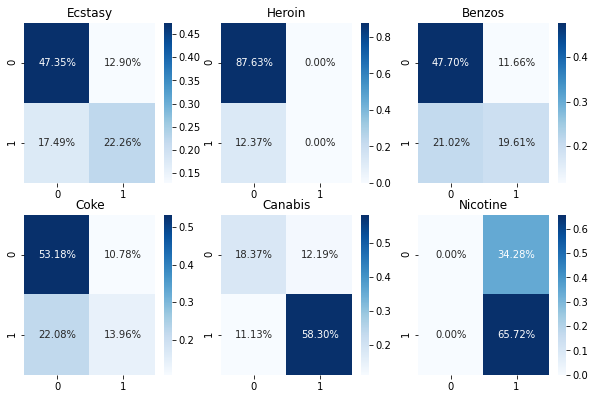

In [107]:
cf_ec = confusion_matrix(y_testec, y_ec)
cf_he = confusion_matrix(y_testhe, y_he)
cf_be = confusion_matrix(y_testbe, y_be)
cf_co = confusion_matrix(y_testco, y_co)
cf_ca = confusion_matrix(y_testca, y_ca)
cf_ni = confusion_matrix(y_testni, y_ni)

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(331)
ax.set_title('Ecstasy')
sns.heatmap(cf_ec/np.sum(cf_ec), annot=True, 
            fmt='.2%', cmap='Blues')
ax1 = f.add_subplot(332)
ax1.set_title('Heroin')
sns.heatmap(cf_he/np.sum(cf_he), annot=True, 
            fmt='.2%', cmap='Blues')
ax3 = f.add_subplot(333)
ax3.set_title('Benzos')
sns.heatmap(cf_be/np.sum(cf_be), annot=True, 
            fmt='.2%', cmap='Blues')
ax4 = f.add_subplot(334)
ax4.set_title('Coke')
sns.heatmap(cf_co/np.sum(cf_co), annot=True, 
            fmt='.2%', cmap='Blues')
ax5 = f.add_subplot(335)
ax5.set_title('Canabis')
sns.heatmap(cf_ca/np.sum(cf_ca), annot=True, 
            fmt='.2%', cmap='Blues')
ax6 = f.add_subplot(336)
ax6.set_title('Nicotine')
sns.heatmap(cf_ni/np.sum(cf_ni), annot=True, 
            fmt='.2%', cmap='Blues')



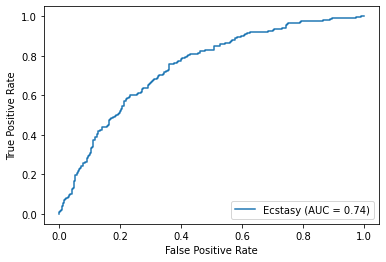

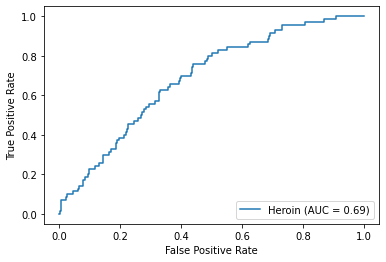

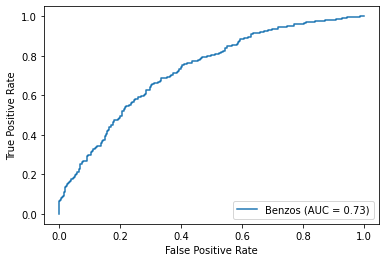

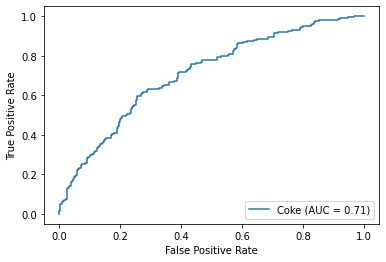

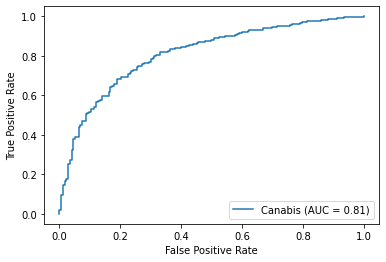

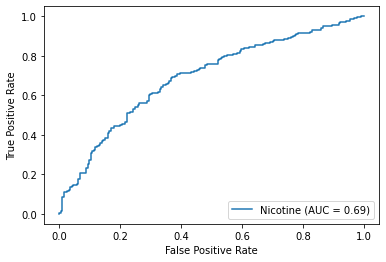

In [108]:

metrics.plot_roc_curve(svc_ec, X_testec, y_testec, name = "Ecstasy")

metrics.plot_roc_curve(svc_he, X_testhe, y_testhe, name = "Heroin")


metrics.plot_roc_curve(svc_be, X_testbe, y_testbe, name = "Benzos")


metrics.plot_roc_curve(svc_co, X_testco, y_testco, name = "Coke")


metrics.plot_roc_curve(svc_ca, X_testca, y_testca, name = "Canabis")

metrics.plot_roc_curve(svc_ni, X_testni, y_testni, name = "Nicotine")

Les résultats sont plutôt bons en particulier pour certaines drogues (comme le canabis) 

### 2.2 Sklearn Naive Bayes

In [109]:
bn_ec = GaussianNB()
bn_ec.fit(X_trainec, y_trainec)

bn_he = GaussianNB()
bn_he.fit(X_trainhe, y_trainhe)

bn_be = GaussianNB()
bn_be.fit(X_trainbe, y_trainbe)

bn_co = GaussianNB()
bn_co.fit(X_trainco, y_trainco)

bn_ca = GaussianNB()
bn_ca.fit(X_trainca, y_trainca)

bn_ni = GaussianNB()
bn_ni.fit(X_trainni, y_trainni)

GaussianNB()

In [110]:
ybn_ec = bn_ec.predict(X_testec)
ybn_he = bn_he.predict(X_testhe)
ybn_be = bn_be.predict(X_testbe)
ybn_co = bn_co.predict(X_testco)
ybn_ca = bn_ca.predict(X_testca)
ybn_ni = bn_ni.predict(X_testni)

<AxesSubplot:title={'center':'Nicotine'}>

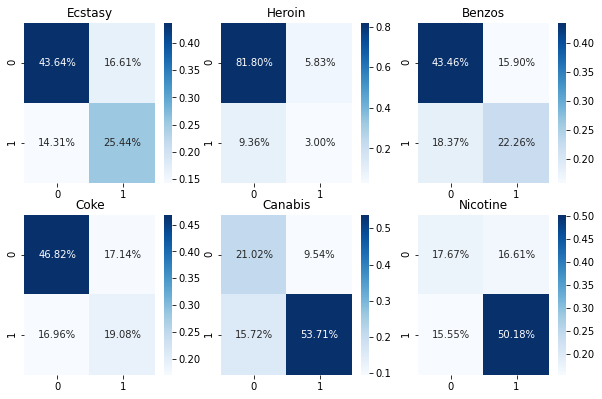

In [111]:
cfbn_ec = confusion_matrix(y_testec, ybn_ec)
cfbn_he = confusion_matrix(y_testhe, ybn_he)
cfbn_be = confusion_matrix(y_testbe, ybn_be)
cfbn_co = confusion_matrix(y_testco, ybn_co)
cfbn_ca = confusion_matrix(y_testca, ybn_ca)
cfbn_ni = confusion_matrix(y_testni, ybn_ni)

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(331)
ax.set_title('Ecstasy')
sns.heatmap(cfbn_ec/np.sum(cfbn_ec), annot=True, 
            fmt='.2%', cmap='Blues')
ax1 = f.add_subplot(332)
ax1.set_title('Heroin')
sns.heatmap(cfbn_he/np.sum(cfbn_he), annot=True, 
            fmt='.2%', cmap='Blues')
ax3 = f.add_subplot(333)
ax3.set_title('Benzos')
sns.heatmap(cfbn_be/np.sum(cfbn_be), annot=True, 
            fmt='.2%', cmap='Blues')
ax4 = f.add_subplot(334)
ax4.set_title('Coke')
sns.heatmap(cfbn_co/np.sum(cfbn_co), annot=True, 
            fmt='.2%', cmap='Blues')
ax5 = f.add_subplot(335)
ax5.set_title('Canabis')
sns.heatmap(cfbn_ca/np.sum(cfbn_ca), annot=True, 
            fmt='.2%', cmap='Blues')
ax6 = f.add_subplot(336)
ax6.set_title('Nicotine')
sns.heatmap(cfbn_ni/np.sum(cfbn_ni), annot=True, 
            fmt='.2%', cmap='Blues')


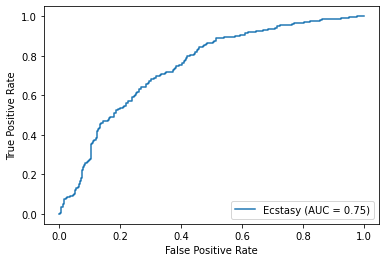

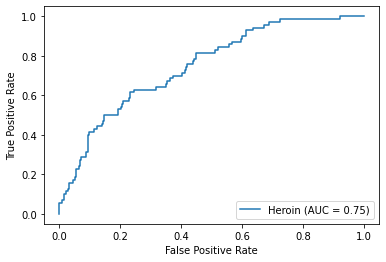

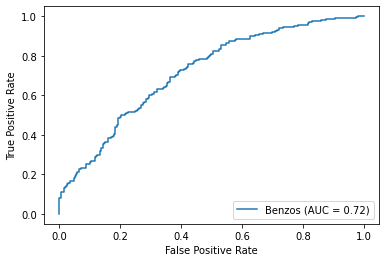

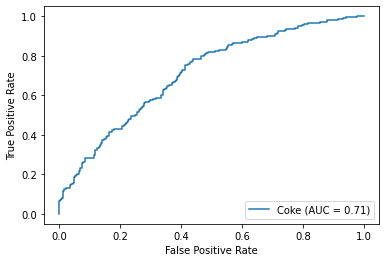

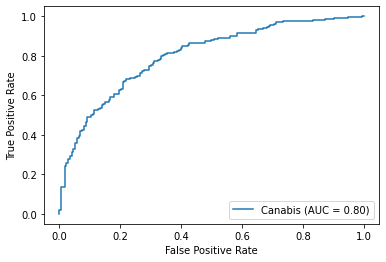

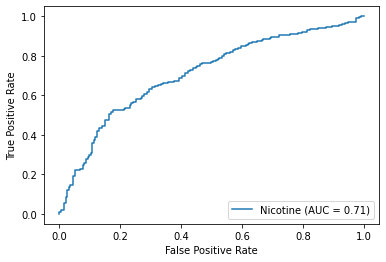

In [112]:
metrics.plot_roc_curve(bn_ec, X_testec, y_testec, name = "Ecstasy")

metrics.plot_roc_curve(bn_he, X_testhe, y_testhe, name = "Heroin")


metrics.plot_roc_curve(bn_be, X_testbe, y_testbe, name = "Benzos")


metrics.plot_roc_curve(bn_co, X_testco, y_testco, name = "Coke")


metrics.plot_roc_curve(bn_ca, X_testca, y_testca, name = "Canabis")

metrics.plot_roc_curve(bn_ni, X_testni, y_testni, name = "Nicotine")

D'après les matrices de convolution et les ROC curve, on peut dire que cet algorithme donne en général de bons résultats. 

### 2.3 Sklearn k nearest neighbors

In [113]:
n_ec = KNeighborsClassifier(n_neighbors=3)
n_ec.fit(X_trainec, y_trainec)

n_he = KNeighborsClassifier(n_neighbors=3)
n_he.fit(X_trainhe, y_trainhe)

n_be = KNeighborsClassifier(n_neighbors=3)
n_be.fit(X_trainbe, y_trainbe)

n_co = KNeighborsClassifier(n_neighbors=3)
n_co.fit(X_trainco, y_trainco)

n_ca = KNeighborsClassifier(n_neighbors=3)
n_ca.fit(X_trainca, y_trainca)

n_ni = KNeighborsClassifier(n_neighbors=3)
n_ni.fit(X_trainni, y_trainni)

KNeighborsClassifier(n_neighbors=3)

In [114]:
yn_ec = n_ec.predict(X_testec)
yn_he = n_he.predict(X_testhe)
yn_be = n_be.predict(X_testbe)
yn_co = n_co.predict(X_testco)
yn_ca = n_ca.predict(X_testca)
yn_ni = n_ni.predict(X_testni)

<AxesSubplot:title={'center':'Nicotine'}>

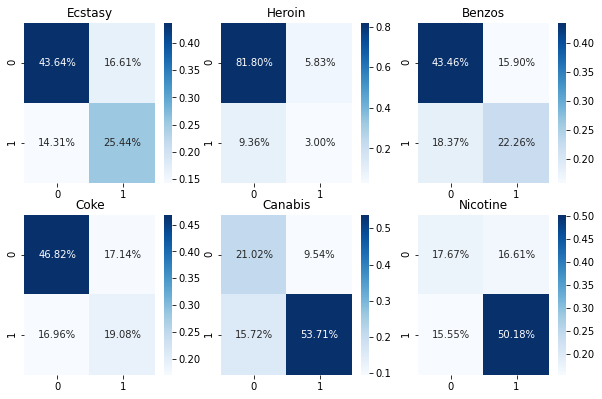

In [115]:
cfn_ec = confusion_matrix(y_testec, yn_ec)
cfn_he = confusion_matrix(y_testhe, yn_he)
cfn_be = confusion_matrix(y_testbe, yn_be)
cfn_co = confusion_matrix(y_testco, yn_co)
cfn_ca = confusion_matrix(y_testca, yn_ca)
cfn_ni = confusion_matrix(y_testni, yn_ni)

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(331)
ax.set_title('Ecstasy')
sns.heatmap(cfbn_ec/np.sum(cfbn_ec), annot=True, 
            fmt='.2%', cmap='Blues')
ax1 = f.add_subplot(332)
ax1.set_title('Heroin')
sns.heatmap(cfbn_he/np.sum(cfbn_he), annot=True, 
            fmt='.2%', cmap='Blues')
ax3 = f.add_subplot(333)
ax3.set_title('Benzos')
sns.heatmap(cfbn_be/np.sum(cfbn_be), annot=True, 
            fmt='.2%', cmap='Blues')
ax4 = f.add_subplot(334)
ax4.set_title('Coke')
sns.heatmap(cfbn_co/np.sum(cfbn_co), annot=True, 
            fmt='.2%', cmap='Blues')
ax5 = f.add_subplot(335)
ax5.set_title('Canabis')
sns.heatmap(cfbn_ca/np.sum(cfbn_ca), annot=True, 
            fmt='.2%', cmap='Blues')
ax6 = f.add_subplot(336)
ax6.set_title('Nicotine')
sns.heatmap(cfbn_ni/np.sum(cfbn_ni), annot=True, 
            fmt='.2%', cmap='Blues')

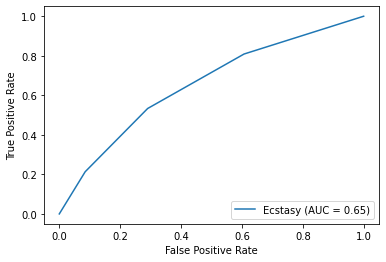

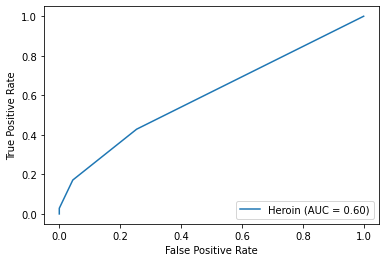

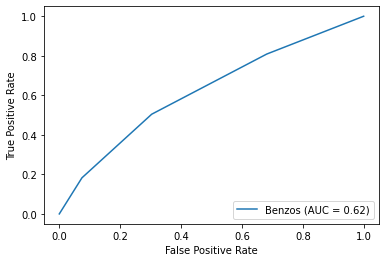

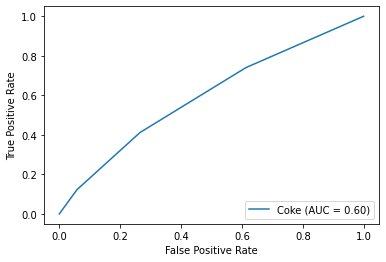

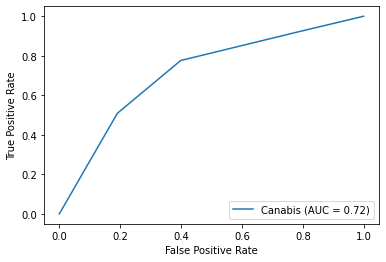

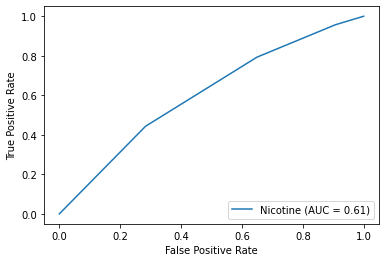

In [116]:
metrics.plot_roc_curve(n_ec, X_testec, y_testec, name = "Ecstasy")

metrics.plot_roc_curve(n_he, X_testhe, y_testhe, name = "Heroin")


metrics.plot_roc_curve(n_be, X_testbe, y_testbe, name = "Benzos")


metrics.plot_roc_curve(n_co, X_testco, y_testco, name = "Coke")


metrics.plot_roc_curve(n_ca, X_testca, y_testca, name = "Canabis")

metrics.plot_roc_curve(n_ni, X_testni, y_testni, name = "Nicotine")

Cet algorithme donne en moyenne des résulats un peu moins bon que le Naive Bayes et le SVC

### Conclusion

Il est donc possible et assez efficace de créer des modèles avec notre dataset. Ces modèles permettent, à partir des paramètres scores psychologiques d'un individu, de prévoir s'il est probable qu'il consomme telles drogues.   Ici on a testé avec 6 drogues différentes et les résultats sont plutôt bons.    
On remarque qu'un même modèle n'est pas forcément le meilleur pour chaque drogue. Il faudrait donc définir quelle méthode donne les meilleurs résultats sur chaque drogue et ainsi créer le modèle le plus optimal pour chaque si on voulait les utiliser dans des domaines médicaux par exemple.   
Les chercheurs ayant travaillé sur ce dataset mettent aussi en évidence ceci dans leurs travaux.

## 3. Apprentissage : corrélation entre drogues (pléiades)

Comme mentionné dans le paragraphe de la matrice de corrélation, on observe un lien entre la consommation de différentes drogues. Ce lien est prouvé par des chercheurs et cela s'appelle une pléiade. Utiliser cet élément pourrait donner des modèles d'apprentissage assez intéressants qui pourraient s'utiliser en complément de ce que nous avons montré précédemment. Nous allons tester ceci sur la pléiade de l'ecstasy.    
Comme le montre la matrice et la théorie, un consommateur d'Ecstasy est susceptible de consommer amphetamines, cannabis, cocaine, ketamine, LSD, magic mushrooms, legal highs.

In [117]:
yu = new_data['Ecstasy']

# Splitting in train test.
from sklearn.model_selection import train_test_split
predicted_class_names = ['Ecstasy']

X = new_data[feature_col_names].values

X_train, X_test, y_train, y_test = train_test_split(X, yu, test_size=0.30, random_state=42)

### 1. SVM

In [118]:
nb_lignes = 1500
start_time = print_time()

svm_pleiade = svm_grid_search(X_train[:nb_lignes], y_train[:nb_lignes].values)

end_time = print_time()
print ("\nDuration time :", end_time - start_time)

21:02:46
------------------------------ 
 svm_grid_search
 best_score_ = 0.71 with =  SVC(cache_size=10, degree=2, gamma=0.01, kernel='sigmoid', probability=True) 
mean_fit_time                                                 0.0712804
std_fit_time                                                 0.00245427
mean_score_time                                              0.00335779
std_score_time                                              9.18161e-05
param_C                                                               1
param_cache_size                                                     10
param_class_weight                                                 None
param_coef0                                                           0
param_degree                                                          2
param_gamma                                                        0.01
param_kernel                                                    sigmoid
param_max_iter                              

Confusion matrix, without normalization
[[277  64]
 [103 122]]


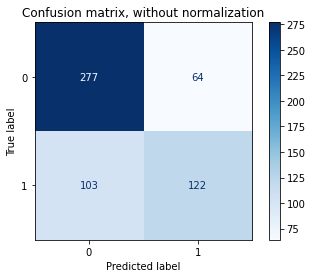

In [119]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_pleiade, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

No handles with labels found to put in legend.


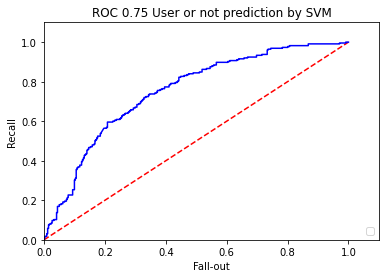

In [120]:
draw_roc_curve(svm_pleiade, X_test, y_test, "User or not prediction by SVM")

### Random Forest

In [121]:
nb_lignes = 1500
start_time = print_time()

rf_pleiade = RandomForest_grid_search(X_train[:nb_lignes], y_train[:nb_lignes])

end_time = print_time()
print ("\nDuration time :", end_time - start_time)


21:02:55
------------------------------ 
 RandomForestClassifier
 best_score_ 0.7103698582786035 with =  RandomForestClassifier() 
21:02:56

Duration time : 1.3479349613189697


Confusion matrix, without normalization
[[258  83]
 [110 115]]


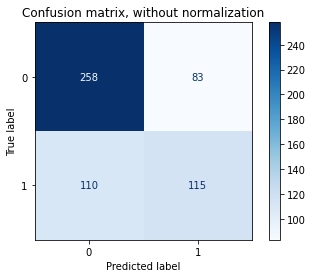

In [123]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_pleiade, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

No handles with labels found to put in legend.


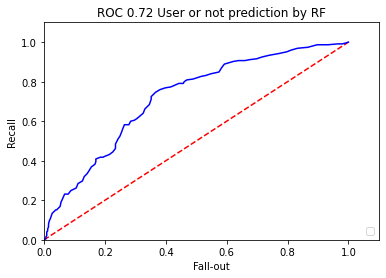

In [125]:
draw_roc_curve(rf_pleiade, X_test, y_test, "User or not prediction by RF")

### Conclusion

Utiliser le concept de pléiade est aussi efficace (ce qui était prévisible car c'est un concept prouvé). On peut donc aussi l'utiliser comme modèle de prédiction.   
D'un point de vue application, cela dépend des informations que nous avons à disposition. Cela est peut être plus interessant d'utiliser les scores car si on effectue des tests avec des personnes, ces scores peuvent être plus facilement receuillis que ceux de la consommation de certaines drogues. 

# API

Pour faire marcher une API Flask, on va exporter un de nos modèles précedemment établi. Prenons le cas du modèle SVC pour l'Ecstasy



In [126]:
import pickle
import joblib
filename = "svc.pkl"
joblib.dump(svc_ec, filename)

['svc.pkl']